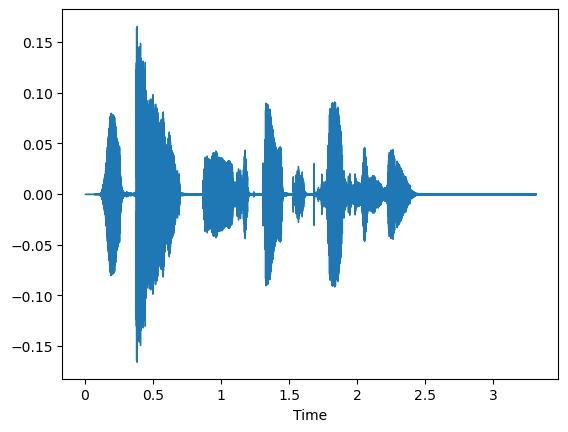

In [5]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
speech_signal , sr = librosa.load(r"C:\Users\HP\Downloads\speech processing.mp3")
first_derivative = librosa.feature.delta(speech_signal)
librosa.display.waveshow(first_derivative)

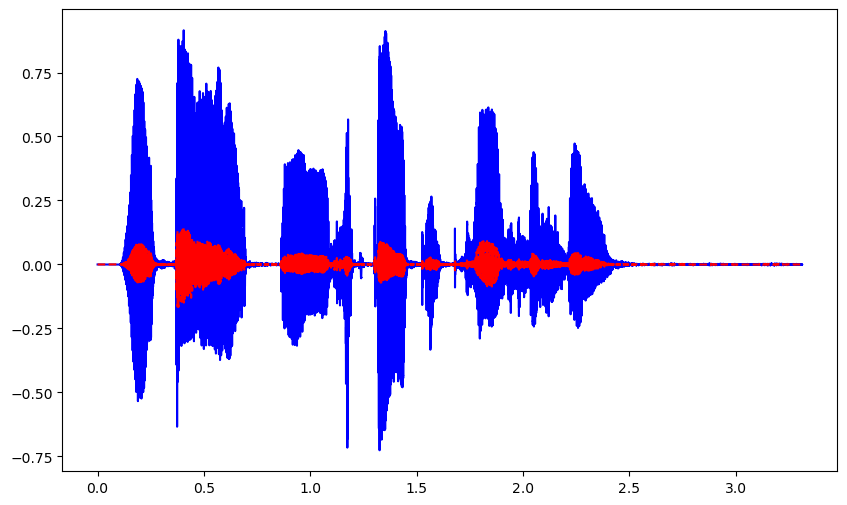

In [6]:
time = np.arange(0, len(speech_signal)) / sr
plt.figure(figsize=(10, 6))
plt.plot(time, speech_signal, label='Original Signal', color='b')
plt.plot(time, first_derivative, label='First Derivative', color='r', linestyle='--')

In [7]:
Audio(data = speech_signal, rate = sr)

In [8]:
Audio(data = first_derivative, rate = sr)

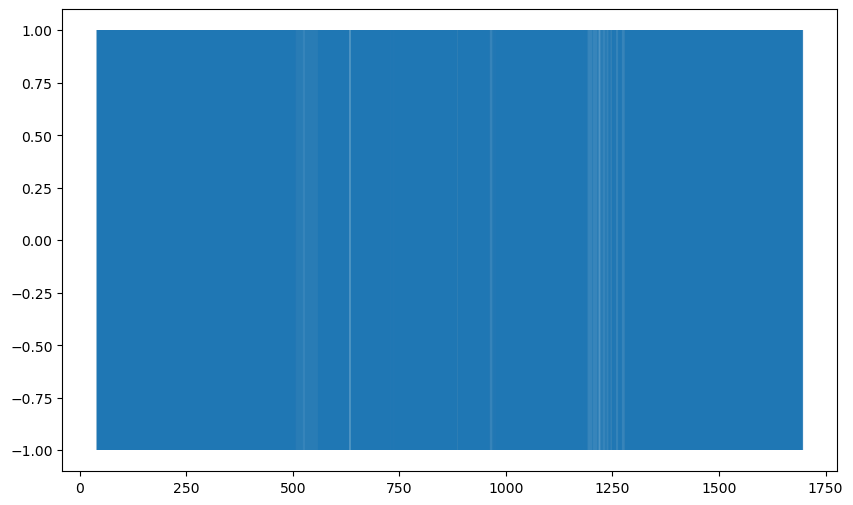

In [21]:
zero_crossings = librosa.zero_crossings(speech_signal,pad = False)
plt.figure(figsize=(10, 6))
plt.vlines(librosa.frames_to_time(np.where(zero_crossings)),1,-1, alpha=0.5, label='Zero Crossings')

In [22]:
threshold = 0.2
speech_regions = np.where(np.abs(speech_signal) > threshold)[0]
silence_regions = np.where(np.abs(speech_signal) <= threshold)[0]

In [34]:
speech_zero_crossings = np.diff(zero_crossings[np.where(np.isin(zero_crossings, speech_regions))[0]])

In [35]:
silence_zero_crossings = np.diff(zero_crossings[np.where(np.isin(zero_crossings, silence_regions))[0]])

In [36]:
length_speech = np.mean(speech_zero_crossings)
length_silence = np.mean(silence_zero_crossings)

print(length_speech)
print(length_silence)

nan
0.1619082830108587


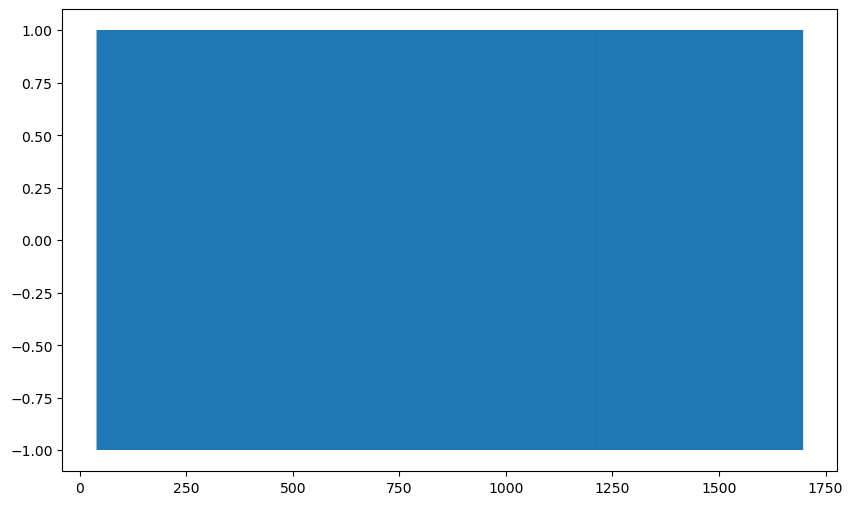

In [37]:
plt.figure(figsize=(10, 6))
plt.vlines(librosa.frames_to_time(np.where(speech_zero_crossings)),1,-1, alpha=0.5)
plt.vlines(librosa.frames_to_time(np.where(silence_zero_crossings)),1,-1, alpha=0.5)
plt.show()